In [ ]:
__author__ = 'Pascal Louis <plouis35@gmail.com>'
__version__ = '0.1 alpha'
__keywords__ = ['astronomy', 'astropy', 'ccdproc', 'photutils', 'matplotlib']
__inherited_from__ = 'https://hebl.china-vo.org/course/PIA2020/et_schmidt_datareduction.pdf'

# tools for exoplanet / binary stars reduction and analysis 

- This notebook presents the basic data reduction and differential photometry for an exoplanet monitored by the 60/90-cm Schmidt telescope, which is operated 
by BATC Group at NAOC.

- copied from : https://hebl.china-vo.org/course/PIA2020/et_schmidt_datareduction.pdR

Data directory in demo
note that all data taken by the Schmdit telescope were overscan-subtracted when the images were taken. Image direction for the raw data: north is dow, 
east is left. No dark frame was taken due to very low dark current
RAW DATA in "raw_data" directory
1. d*BIAS*.fit: zero (bias) full frames with overscan subtracted (size: 4096x4096)
2. d*FLATR*.fit: dome flat full frames with overscan subtracted
3. d*UW32R*.fit: truncated science frames (an subregion with size of 512x512, origin point stored in CRVAL in the FITS header)
Reduced DATA in "reduced_data" directory (generated during this course)
1. p*UW32R*.fit: reduced data with correction of the bias and flat-fielding
2. p*UW32R*-cat.fit: catalog with aperture photometry

SIMPLE  =                    T / NORMAL FITS IMAGE                              BITPIX  =                   16 / DATA PRECISION                                 NAXIS   =                    2 / NUMBER OF IMAGE DIMENSIONS                     NAXIS1  =                  512 / NUMBER OF COLUMNS                              NAXIS2  =                  512 / NUMBER OF ROWS                                 BLOCKED =                    T / CHECK FOR POSSIBLE BLOCKING                    CRVAL1  =                 1100 / COLUMN ORIGIN                                  CRVAL2  =                 1920 / ROW ORIGIN                                     CDELT1  =                    1 / COLUMN BINNING                                 CDELT2  =                    1 / ROW BINNING                                    IMNAME  = '              UW32' / OBSERVATION SEQUENCE NAME                      DATE-OBS= '          10/12/13' / DATE OF START OF OBSERVATION                   TIME    = '        12:19:44.0' / UT TIME

 [astropy.io.fits.verify]


Text(0.5, 1.0, 'north up, east left')

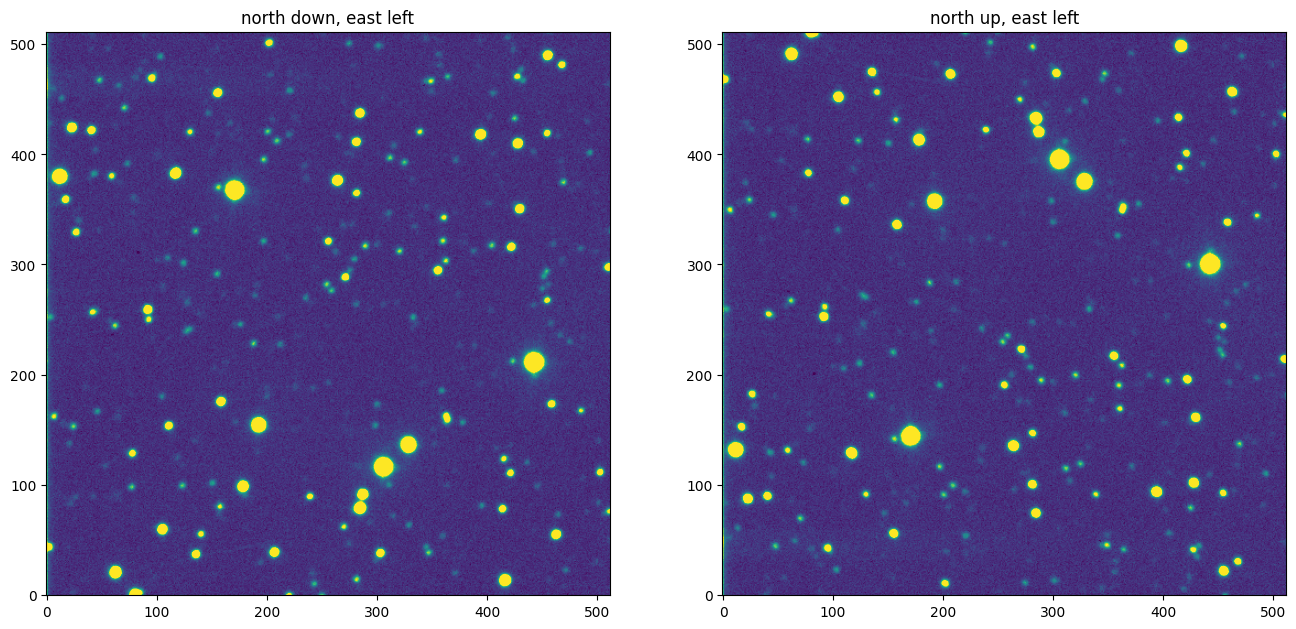

In [1]:
# let's first see an example of the FITS header and check the data
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np
head=fits.getheader('../../raw_data/d4466637UW32R008.fit')
data=fits.getdata("../../raw_data/d4466637UW32R004.fit")
print(head)
f,axs=plt.subplots(1,2,figsize=(16,8))
axs[0].imshow(data,vmin=300,vmax=600,origin='lower')
axs[0].set_title("north down, east left")
axs[1].imshow(np.flipud(data),vmin=300,vmax=600,origin='lower')
axs[1].set_title("north up, east left")

In [2]:
## let's fist check the bias image
import glob
bfiles=glob.glob("../../raw_data/d*BIASR*.fit")
bfiles.sort()
allbias=[]
print("combining bias ...")
for i,ifile in enumerate(bfiles):
 print("reading bias:", i+1,len(bfiles),ifile)
 data=fits.getdata(ifile)
 allbias.append(data)
allbias=np.stack(allbias)
print(allbias.shape)
superbias=np.median(allbias,axis=0)
fits.writeto('../../reduced_data/bias.fit',superbias.astype('float32'),overwrite=True)



combining bias ...
reading bias: 1 12 ../../raw_data/d4466637BIASR213.fit
reading bias: 2 12 ../../raw_data/d4466637BIASR214.fit


reading bias: 3 12 ../../raw_data/d4466637BIASR215.fit
reading bias: 4 12 ../../raw_data/d4466637BIASR216.fit
reading bias: 5 12 ../../raw_data/d4466637BIASR217.fit
reading bias: 6 12 ../../raw_data/d4466637BIASR218.fit
reading bias: 7 12 ../../raw_data/d4466637BIASR219.fit
reading bias: 8 12 ../../raw_data/d4466637BIASR220.fit
reading bias: 9 12 ../../raw_data/d4466637BIASR221.fit
reading bias: 10 12 ../../raw_data/d4466637BIASR222.fit
reading bias: 11 12 ../../raw_data/d4466637BIASR223.fit
reading bias: 12 12 ../../raw_data/d4466637BIASR224.fit
(12, 4096, 4096)


Text(0.5, 1.0, 'super bias derived from bias frames')

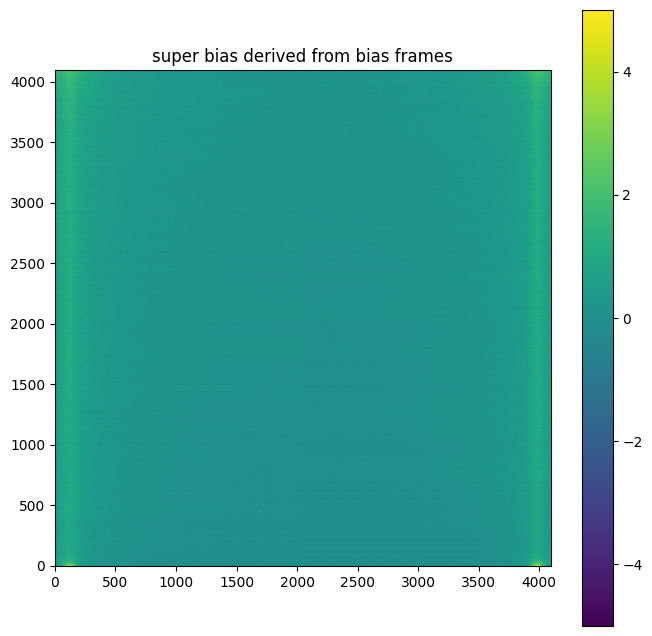

In [4]:
## display the super bias
plt.figure(figsize=(8,8))
plt.imshow(superbias,vmin=-5,vmax=5,origin='lower')
plt.colorbar()
plt.title("super bias derived from bias frames")

In [5]:
ffiles=glob.glob("../../raw_data/d*FLATR*.fit")
ffiles.sort()
allflat=[]
print("combining dome flats...")
for i,ifile in enumerate(ffiles):
 print("reading flat:", i+1,len(ffiles),ifile)
 # flat-fielding: subtract bias and then normalize the flat images
 data=fits.getdata(ifile)-superbias
 mflat=np.median(data[1500-256:1500+256,1500-256:1500+256])
 data/=mflat
 print("median flat:",mflat)
 allflat.append(data)
allflat=np.stack(allflat)
print(allflat.shape)
domeflat=np.median(allflat,axis=0)
fits.writeto('../../reduced_data/domeflat.fit',domeflat.astype('float32'),overwrite=True)

combining dome flats...
reading flat: 1 12 ../../raw_data/d4466637FLATR201.fit
median flat: 8986.0
reading flat: 2 12 ../../raw_data/d4466637FLATR202.fit
median flat: 9160.0
reading flat: 3 12 ../../raw_data/d4466637FLATR203.fit
median flat: 9150.0
reading flat: 4 12 ../../raw_data/d4466637FLATR204.fit
median flat: 9214.0
reading flat: 5 12 ../../raw_data/d4466637FLATR205.fit
median flat: 8802.0
reading flat: 6 12 ../../raw_data/d4466637FLATR206.fit
median flat: 8786.0
reading flat: 7 12 ../../raw_data/d4466637FLATR207.fit
median flat: 8832.0
reading flat: 8 12 ../../raw_data/d4466637FLATR208.fit
median flat: 8754.0
reading flat: 9 12 ../../raw_data/d4466637FLATR209.fit
median flat: 8694.0
reading flat: 10 12 ../../raw_data/d4466637FLATR210.fit
median flat: 8684.5
reading flat: 11 12 ../../raw_data/d4466637FLATR211.fit
median flat: 8906.5
reading flat: 12 12 ../../raw_data/d4466637FLATR212.fit
median flat: 9171.0
(12, 4096, 4096)


Text(0.5, 1.0, 'dome flat derived from dome flats')

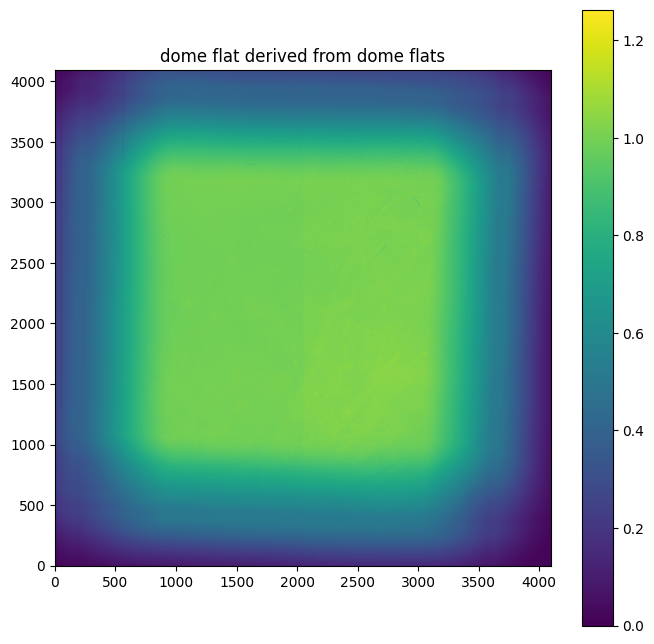

In [6]:
## display the super flat
plt.figure(figsize=(8,8))
plt.imshow(domeflat,origin='lower')
plt.colorbar()
plt.title("dome flat derived from dome flats")

In [7]:
## calculate gain and read noise
from astropy.stats import sigma_clipped_stats
biasfile1='../../raw_data/d4466637BIASR213.fit'
biasfile2='../../raw_data/d4466637BIASR214.fit'
flatfile1='../../raw_data/d4466637FLATR201.fit'
flatfile2='../../raw_data/d4466637FLATR202.fit'
bias1=fits.getdata(biasfile1)[1500-256:1500+256,1500-256:1500+256]
bias2=fits.getdata(biasfile2)[1500-256:1500+256,1500-256:1500+256]
flat1=fits.getdata(flatfile1)[1500-256:1500+256,1500-256:1500+256]
flat2=fits.getdata(flatfile2)[1500-256:1500+256,1500-256:1500+256]
mean_flat1=np.median(flat1)
mean_flat2=np.median(flat2)
mean_bias1=np.median(bias1)
mean_bias2=np.median(bias2)
_,_,std_biasdiff=sigma_clipped_stats(bias1-bias2,sigma=4.0,maxiters=2)
_,_,std_flatdiff=sigma_clipped_stats(flat1-flat2,sigma=4.0,maxiters=2)
print(mean_bias1,mean_bias2,mean_flat1,mean_flat2,std_biasdiff,std_flatdiff)
gain=((mean_flat1+mean_flat2)-(mean_bias1+mean_bias2))/((std_flatdiff**2-std_biasdiff**2))
rdnoise=gain*std_biasdiff/np.sqrt(2)
print("gain: ",gain, "readout noise:",rdnoise)

0.0 0.0 8986.0 9160.0 2.905397 72.79242
gain:  3.430054470497312 readout noise: 7.046792664146595


In [14]:
## get the center of FoV (pointing to the target) and adding parameters to the FITS header
from astropy.coordinates import SkyCoord
import astropy.units as u
import glob,os
c=SkyCoord("02:04:10.278","+46:41:16.2",frame='icrs',unit=(u.hourangle,u.degree))
ra=c.ra.degree; dec=c.dec.degree
print("ra:", ra, "dec:",c.dec.degree)
epoch=2000.0 
pixscale=0.137 # in arcsec
# add keywords to FITS header of science frames
outdir="../../reduced_data/"
sfiles=glob.glob("../../raw_data/d*UW32R*.fit") # science frames
sfiles.sort() # in alphabetic order 
for i,ifile in enumerate(sfiles):
    print("reducing (debias, flat-fielding, and flipping) :", i+1,len(sfiles),ifile)
    indir,infile=os.path.split(ifile)
    rootname,_=os.path.splitext(infile)
    # we change the first character from "d" to "p" for new files and ensure not to cover the raw data
    outfile=os.path.join(outdir,"p"+rootname[1:]+'.fit') 
    head=fits.getheader(ifile,output_verifystr="silentfix")
    # get the origin of the subregion
    col_origin=head['CRVAL1']
    row_origin=head['CRVAL2']
    subflat=domeflat[row_origin:row_origin+512,col_origin:col_origin+512]
    subbias=superbias[row_origin:row_origin+512,col_origin:col_origin+512]
    if i==0:
        ## to show an example of the subsection of bias and flat
        fits.writeto('../../reduced_data/subflat.fit',subflat.astype('float32'),overwrite=True)
        fits.writeto('../../reduced_data/subbias.fit',subbias.astype('float32'),overwrite=True)
        #break
    data=fits.getdata(ifile)
    
    # de-bias and flat-fielding
    data=(data-subbias)/subflat
    # set the initial reference point in the WCS parameters if doing astrometry 
    head['epoch']=2000.0
    head['CRVAL1']=ra
    head['CRVAL2']=dec
    head['CRPIX1']=head['NAXIS1']/2.0
    head['CRPIX2']=head['NAXIS2']/2.0
    head['CDELT1']=-pixscale/3600.0 # minus for left east
    head['CDELT2']=pixscale/3600.0
    head['CTYPE1']='RA---TAN' # projection type
    head['CTYPE2']='DEC--TAN'
    head['GAIN']=(gain,'GAIN in e-/ADU')
    head['RDNOISE']=(rdnoise,'readout noise in electron')
    print("writing to "+outfile)
    # flip up down to make the image with north up and east left
    fits.writeto(outfile,np.flipud(data),header=head,overwrite=True,output_verify="silentfix")

ra: 31.042824999999997 dec: 46.68783333333333
reducing (debias, flat-fielding, and flipping) : 1 172 ../../raw_data/d4466637UW32R004.fit
writing to ../../reduced_data/p4466637UW32R004.fit
reducing (debias, flat-fielding, and flipping) : 2 172 ../../raw_data/d4466637UW32R005.fit
writing to ../../reduced_data/p4466637UW32R005.fit


reducing (debias, flat-fielding, and flipping) : 3 172 ../../raw_data/d4466637UW32R007.fit
writing to ../../reduced_data/p4466637UW32R007.fit
reducing (debias, flat-fielding, and flipping) : 4 172 ../../raw_data/d4466637UW32R008.fit
writing to ../../reduced_data/p4466637UW32R008.fit
reducing (debias, flat-fielding, and flipping) : 5 172 ../../raw_data/d4466637UW32R009.fit
writing to ../../reduced_data/p4466637UW32R009.fit
reducing (debias, flat-fielding, and flipping) : 6 172 ../../raw_data/d4466637UW32R010.fit
writing to ../../reduced_data/p4466637UW32R010.fit
reducing (debias, flat-fielding, and flipping) : 7 172 ../../raw_data/d4466637UW32R011.fit
writing to ../../reduced_data/p4466637UW32R011.fit
reducing (debias, flat-fielding, and flipping) : 8 172 ../../raw_data/d4466637UW32R012.fit
writing to ../../reduced_data/p4466637UW32R012.fit
reducing (debias, flat-fielding, and flipping) : 9 172 ../../raw_data/d4466637UW32R013.fit
writing to ../../reduced_data/p4466637UW32R013.fit
reduci

In [ ]:
es):
 print("reducing (debias, flat-fielding, and flipping) :", i+1,len(sfiles),ifile)
 indir,infile=os.path.split(ifile)
 rootname,_=os.path.splitext(infile)
 # we change the first character from "d" to "p" for new files and ensure not to cover the raw data
 outfile=os.path.join(outdir,"p"+rootname[1:]+'.fit') 
 head=fits.getheader(ifile,output_verifystr="silentfix")
 # get the origin of the subregion
 col_origin=head['CRVAL1']
 row_origin=head['CRVAL2']
 subflat=domeflat[row_origin:row_origin+512,col_origin:col_origin+512]
 subbias=superbias[row_origin:row_origin+512,col_origin:col_origin+512]
 if i==0:
 ## to show an example of the subsection of bias and flat
 fits.writeto('reduced_data/subflat.fit',subflat.astype('float32'),overwrite=True)
 fits.writeto('reduced_data/subbias.fit',subbias.astype('float32'),overwrite=True)
 #break
 data=fits.getdata(ifile)
 
 # de-bias and flat-fielding
 data=(data-subbias)/subflat
 # set the initial reference point in the WCS parameters if doing astrometry 
 head['epoch']=2000.0
 head['CRVAL1']=ra
 head['CRVAL2']=dec
 head['CRPIX1']=head['NAXIS1']/2.0
 head['CRPIX2']=head['NAXIS2']/2.0
 head['CDELT1']=-pixscale/3600.0 # minus for left east
 head['CDELT2']=pixscale/3600.0
 head['CTYPE1']='RA---TAN' # projection type
 head['CTYPE2']='DEC--TAN'
 head['GAIN']=(gain,'GAIN in e-/ADU')
 head['RDNOISE']=(rdnoise,'readout noise in electron')
 print("writing to "+outfile)
 # flip up down to make the image with north up and east left
 fits.writeto(outfile,np.flipud(data),header=head,overwrite=True,output_verify="silentfix")


## Do astronometry and photometry
- Here we get relative position shift between different exposures and do aperture photometry using the python package of photutils.
- For astrometry, there are several open softwares, including SCAMP (https://www.astromatic.net/software/scamp (https://www.astromatic.net/software/scamp)), Astronometry.net (http://astrometry.net/ (http://astrometry.net/)), which are used to get the astrometric solution from matching the observed stars with stars in a refernce catalog, such as UCAC4, 2MASS, GAIA, etc.
- Usually, we need to do astrometry for tranforming CCD positions of objects to the sky positions, so that we can find the same objects in different observations by cross-matching the catalogs.
- Another important aspect in the data reduction is the photometric calibration, which can convert CCD counts to the physical flux. We don't make flux calibration here, since we aim to get light curve from relative photometry

(344.23, 344.1214, 10.770422)
(344.23, 344.1214, 10.770422)


Text(0.5, 1.0, 'mask')

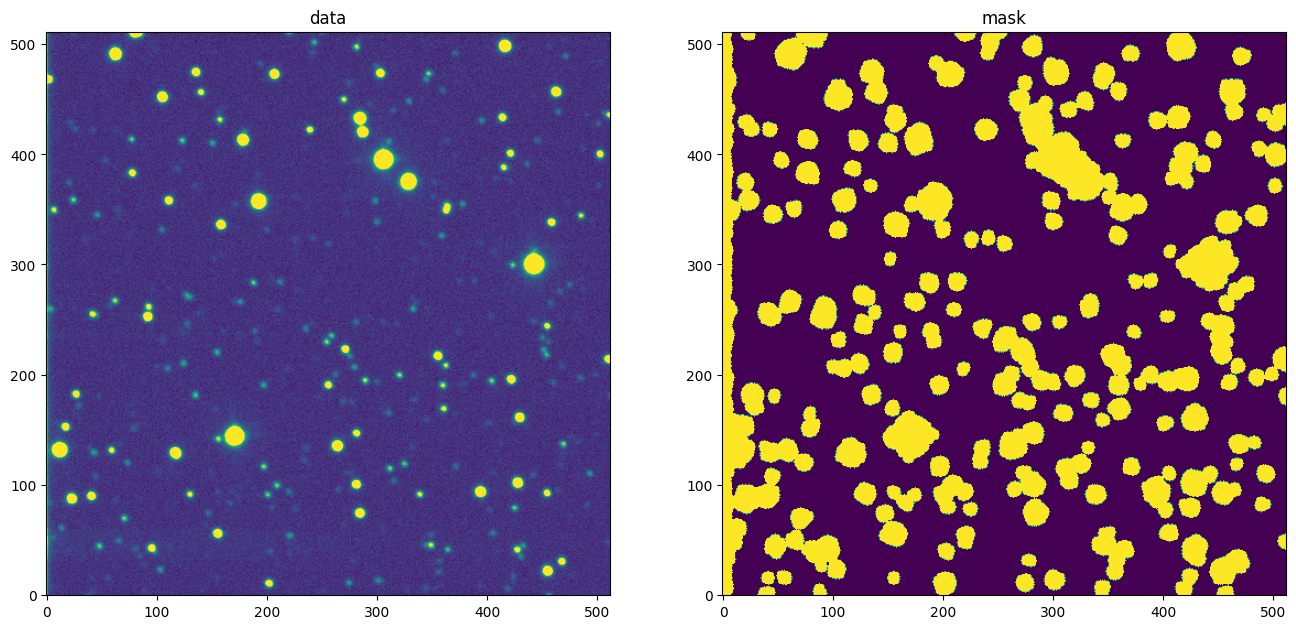

In [29]:
import photutils as pht
from astropy.stats import sigma_clipped_stats, SigmaClip
from photutils.segmentation import detect_threshold, detect_sources
from photutils.utils import circular_footprint

data=fits.getdata('../../reduced_data/p4466637UW32R004.fit')
## here we can show some statistics about the sky

sigma_clip = SigmaClip(sigma=3.0, maxiters=10)
threshold = detect_threshold(data, nsigma=2.0, sigma_clip=sigma_clip)
segment_img = detect_sources(data, threshold, npixels=5)
footprint = circular_footprint(radius=5)
mask = segment_img.make_source_mask(footprint=footprint)
mean, median, std = sigma_clipped_stats(data, sigma=3.0, mask=mask)
print((mean, median, std))  

#mean, median, std = sigma_clipped_stats(data, sigma=3.0)
## or first mask sources then estimate the sky background
#mask = pht.make_source_mask(data, nsigma=3, npixels=5, dilate_size=11)
#mean, median, std = sigma_clipped_stats(data, sigma=3.0, mask=mask)
#print((mean, median, std)) 
f,axs=plt.subplots(1,2,figsize=(16,8))
axs[0].imshow(data,vmin=300,vmax=600,origin='lower')
axs[0].set_title("data")
axs[1].imshow(mask,origin='lower')
axs[1].set_title("mask")

In [39]:
## get 2D sky map
from astropy.stats import SigmaClip
from photutils.background import SExtractorBackground
from photutils.background import Background2D
sigma_clip = SigmaClip(sigma=3.)
bkg_estimator = SExtractorBackground()
bkg = Background2D(data, (64, 64), mask=mask,filter_size=(3, 3), sigma_clip=sigma_clip, bkg_estimator=bkg_estimator)

In [40]:
 print(bkg.background_median,bkg.background_rms_median)

343.59121653044826 10.672314603360629


Text(0.5, 1.0, 'background rms')

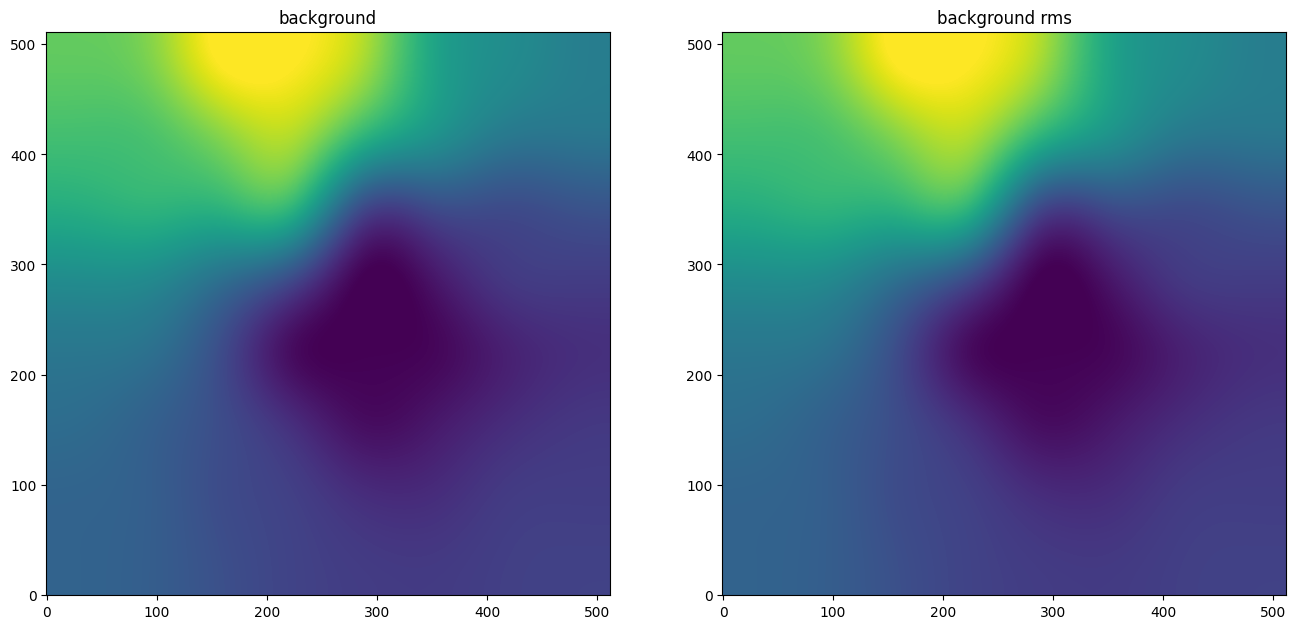

In [41]:
f,axs=plt.subplots(1,2,figsize=(16,8))
axs[0].imshow(bkg.background,origin='lower')
axs[0].set_title("background")
axs[1].imshow(bkg.background_rms,origin='lower')
axs[1].set_title("background rms")

In [46]:
## find objects and calculate basic information
from photutils.detection import IRAFStarFinder
daofind = IRAFStarFinder(fwhm=3.0, threshold=5.*bkg.background_rms_median,exclude_border=True,
                        sharplo=0.5, sharphi=2.0, roundlo=0.0, roundhi=0.7)

sources = daofind(data - bkg.background_median)

In [47]:
print(sources)
print(sources.colnames)

 id     xcentroid          ycentroid             fwhm            sharpness      ... npix    sky            peak               flux                mag        
--- ------------------ ------------------ ------------------ ------------------ ... ---- ---------- ------------------ ------------------ -------------------
  1   202.523177696634 10.037439234166694 1.9552781603401115 0.6517593867800372 ...   12   317.8826  316.5882263183594 2135.5796813964844  -8.323789450464485
  2 274.23682072549207 10.932385960743972 1.9353763907859944 0.6451254635953315 ...   13   57.96107  92.78767395019531   466.221248626709  -6.671480157898289
  3  301.1955941174819 12.795487780139663  2.019457882337275 0.6731526274457583 ...   12  54.547577  54.41351318359375 406.49029541015625  -6.522625454160221
  4 455.04379401250304  21.29081223724996 2.0360311883226507 0.6786770627742169 ...   13  1065.1853   1140.23583984375  8510.512084960938  -9.824889231874748
  5 103.63470115305438 22.794752943369893 2.01261587

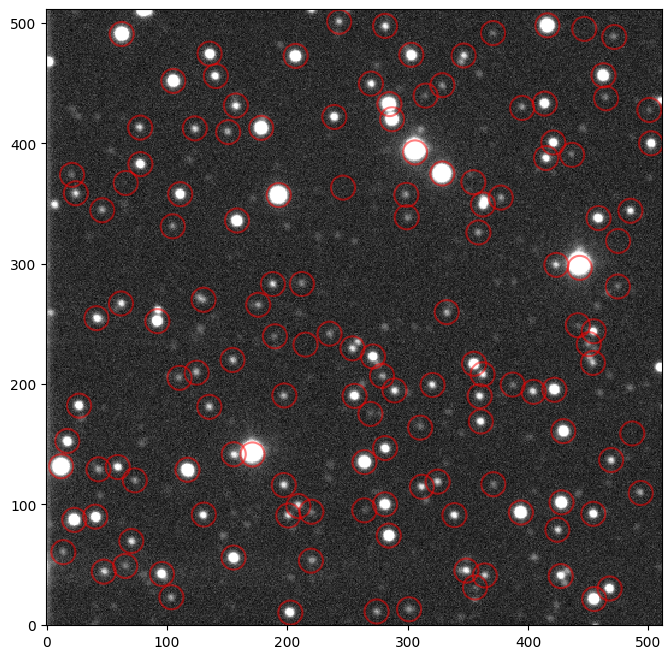

In [50]:
#from photutils import CircularAperture
from photutils.aperture import CircularAperture
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r=10.)
plt.figure(figsize=(8,8))
plt.imshow(data, cmap='Greys_r', origin='lower', vmin=300,vmax=600, interpolation='nearest')
apertures.plot(color='red', lw=1.5, alpha=0.5);


In [51]:
## error estimation
from photutils.utils import calc_total_error
error=calc_total_error(data-bkg.background, bkg.background_rms, gain)
print(np.median(error))

10.712502097439007


In [57]:
## aperture photometry
from astropy.table import Table
from photutils.aperture import CircularAperture
from photutils.aperture import aperture_photometry

from astropy import table
radii=[3,4,5,6,8,10,12,15,20,25] ## aperture radii in pixels
positions=[(ix,iy) for ix,iy in zip(sources['xcentroid'],sources['ycentroid'])]
apertures = [CircularAperture(positions, r=r) for r in radii]
aper_phot= aperture_photometry(data - bkg.background, apertures, error=error)
print(aper_phot.colnames)
#convert flux to magnitude, using a instrumental zeropoint of 25
for i in range(len(radii)):
    fcol='aperture_sum_'+str(i)
    ecol='aperture_sum_err_'+str(i)
    flux=aper_phot[fcol]
    fluxerr=aper_phot[ecol]
    mag=-2.5*np.log10(flux)+25
    magerr=2.5/(flux*np.log(10))*fluxerr
    aper_phot[fcol]=mag
    aper_phot[ecol]=magerr
    aper_phot.rename_column(fcol,'mag_'+str(i))
    aper_phot.rename_column(ecol,'magerr_'+str(i))

['id', 'xcenter', 'ycenter', 'aperture_sum_0', 'aperture_sum_err_0', 'aperture_sum_1', 'aperture_sum_err_1', 'aperture_sum_2', 'aperture_sum_err_2', 'aperture_sum_3', 'aperture_sum_err_3', 'aperture_sum_4', 'aperture_sum_err_4', 'aperture_sum_5', 'aperture_sum_err_5', 'aperture_sum_6', 'aperture_sum_err_6', 'aperture_sum_7', 'aperture_sum_err_7', 'aperture_sum_8', 'aperture_sum_err_8', 'aperture_sum_9', 'aperture_sum_err_9']


/var/folders/r1/s24q5jr91lgb5xgp830lvyj80000gn/T/ipykernel_57480/2511605438.py:18: RuntimeWarning: invalid value encountered in log10
  mag=-2.5*np.log10(flux)+25


In [58]:
print(aper_phot)


 id      xcenter            ycenter             mag_0        ...       mag_8               magerr_8             mag_9              magerr_9      
           pix                pix                            ...                                                                                 
--- ------------------ ------------------ ------------------ ... ------------------ --------------------- ------------------ --------------------
  1   202.523177696634 10.037439234166694  14.88851584673742 ... 14.274561574872626   0.01959084826634282  14.24150963577471   0.0227322129921413
  2 274.23682072549207 10.932385960743972 16.701918700507534 ...   16.1987141669983   0.11476436712629007 15.810465838064756  0.09652565417500901
  3  301.1955941174819 12.795487780139663 16.790946168937335 ... 16.078033755881524   0.10549330403416551 15.950640235399696   0.1126366519511022
  4 455.04379401250304  21.29081223724996 13.564377148025187 ... 12.726142530761527  0.005474493878915644 12.697738159393841

In [62]:
from photutils.background import SExtractorBackground
from photutils.background import Background2D
from photutils.detection import IRAFStarFinder
from photutils.aperture import CircularAperture
from photutils.aperture import aperture_photometry

cfiles=glob.glob("../../reduced_data/p*UW32R*.fit") # science frames
cfiles.sort() # in alphabetic order
radii=[3,4,5,6,8,10,12,15,20,25] ## aperture radii in pixels
for i,ifile in enumerate(cfiles):
    print("aperture photometry :", i+1,len(cfiles),ifile)
    rootname,_=os.path.splitext(ifile)
    catfile=rootname+'-cat.fits'
    data=fits.getdata(ifile)
    ## or first mask sources then estimate the sky background

    sigma_clip = SigmaClip(sigma=3.0, maxiters=10)
    threshold = detect_threshold(data, nsigma=2.0, sigma_clip=sigma_clip)
    segment_img = detect_sources(data, threshold, npixels=5)
    footprint = circular_footprint(radius=5)
    mask = segment_img.make_source_mask(footprint=footprint)
    mean, median, std = sigma_clipped_stats(data, sigma=3.0, mask=mask)

    
    #mask = pht.make_source_mask(data, nsigma=3, npixels=5, dilate_size=11)
    
    
    
    bkg_estimator = SExtractorBackground()
    bkg = Background2D(data, (64, 64), mask=mask,filter_size=(3, 3), 
                           sigma_clip=sigma_clip, bkg_estimator=bkg_estimator)
    print(bkg.background_median,bkg.background_rms_median)
    daofind = IRAFStarFinder(fwhm=3.0, threshold=5.*bkg.background_rms_median,
                                 exclude_border=True, sharplo=0.5, sharphi=2.0, roundlo=0.0, roundhi=0.7)
    sources = daofind(data - bkg.background)
    positions=[(ix,iy) for ix,iy in zip(sources['xcentroid'],sources['ycentroid'])]
    apertures = [CircularAperture(positions, r=r) for r in radii]
    error=calc_total_error(data-bkg.background, bkg.background_rms, gain)
    aper_phot= aperture_photometry(data - bkg.background, apertures, error=error)
    print(len(aper_phot))
    #convert flux to magnitude, using a instrumental zeropoint of 25
    #for j in range(len(radii)):
    # fcol='aperture_sum_'+str(j)
    # ecol='aperture_sum_err_'+str(j)
    #flux=aper_phot[fcol]
    #fluxerr=aper_phot[ecol]
    #mag=-2.5*np.log10(flux)+25
    #magerr=2.5/(flux*np.log(10))*fluxerr
    #aper_phot[fcol]=mag
    #aper_phot[ecol]=magerr
    #aper_phot.rename_column(fcol,'mag_'+str(j))
    #aper_phot.rename_column(ecol,'magerr_'+str(j))
    aper_phot.write(catfile,overwrite=True)


aperture photometry : 1 172 ../../reduced_data/p4466637UW32R004.fit
343.59121653044826 10.672314603360629
142
aperture photometry : 2 172 ../../reduced_data/p4466637UW32R005.fit


337.7501977433563 10.710920091005102
134
aperture photometry : 3 172 ../../reduced_data/p4466637UW32R007.fit


337.1947553744953 10.690870297371717
170
aperture photometry : 4 172 ../../reduced_data/p4466637UW32R008.fit


333.8152172820969 10.521335994132826
161
aperture photometry : 5 172 ../../reduced_data/p4466637UW32R009.fit


330.9998483510071 10.588112499741825
165
aperture photometry : 6 172 ../../reduced_data/p4466637UW32R010.fit


278.8282266414019 9.686796139304516
157
aperture photometry : 7 172 ../../reduced_data/p4466637UW32R011.fit


272.25857546567397 9.492076633680753
162
aperture photometry : 8 172 ../../reduced_data/p4466637UW32R012.fit


268.47338430959775 9.546228384177864
174
aperture photometry : 9 172 ../../reduced_data/p4466637UW32R013.fit


265.29011023557746 9.491557903740475
154
aperture photometry : 10 172 ../../reduced_data/p4466637UW32R014.fit


266.0186448361923 9.476386302806096
170
aperture photometry : 11 172 ../../reduced_data/p4466637UW32R015.fit


266.3306210197135 9.541595181985357
165
aperture photometry : 12 172 ../../reduced_data/p4466637UW32R016.fit


266.19629717068244 9.41293077152546
147
aperture photometry : 13 172 ../../reduced_data/p4466637UW32R017.fit


262.87266874693546 9.438977720627044
135
aperture photometry : 14 172 ../../reduced_data/p4466637UW32R018.fit


266.24102341601014 9.474428127600628
148
aperture photometry : 15 172 ../../reduced_data/p4466637UW32R019.fit


262.2936972424384 9.41543608676739
163
aperture photometry : 16 172 ../../reduced_data/p4466637UW32R020.fit


266.37666694033146 9.457377485642173
132
aperture photometry : 17 172 ../../reduced_data/p4466637UW32R021.fit


261.88226326343465 9.380321499053448
141
aperture photometry : 18 172 ../../reduced_data/p4466637UW32R022.fit


257.616960541936 9.362716339841597
125
aperture photometry : 19 172 ../../reduced_data/p4466637UW32R023.fit


258.27066805350887 9.26635193273576
146
aperture photometry : 20 172 ../../reduced_data/p4466637UW32R024.fit


261.492124858259 9.40950628718797
134
aperture photometry : 21 172 ../../reduced_data/p4466637UW32R025.fit


265.36809558043495 9.410846218127556
129
aperture photometry : 22 172 ../../reduced_data/p4466637UW32R026.fit


263.72805267534477 9.413503265909279
134
aperture photometry : 23 172 ../../reduced_data/p4466637UW32R027.fit


266.10962413757534 9.480098781044695
136
aperture photometry : 24 172 ../../reduced_data/p4466637UW32R028.fit


266.2297223967017 9.401664990159656
94
aperture photometry : 25 172 ../../reduced_data/p4466637UW32R029.fit


257.33696673209727 9.313531976139037
124
aperture photometry : 26 172 ../../reduced_data/p4466637UW32R030.fit
263.84450413429244 9.414983981027088


114
aperture photometry : 27 172 ../../reduced_data/p4466637UW32R031.fit


261.94809215212376 9.42117192845445
120
aperture photometry : 28 172 ../../reduced_data/p4466637UW32R032.fit


256.80062897131825 9.21776902235067
129
aperture photometry : 29 172 ../../reduced_data/p4466637UW32R033.fit


258.7507088062766 9.337551005016525
137
aperture photometry : 30 172 ../../reduced_data/p4466637UW32R034.fit


260.2087123472864 9.388334146006073
111
aperture photometry : 31 172 ../../reduced_data/p4466637UW32R035.fit


256.52056465160905 9.319309393624316
141
aperture photometry : 32 172 ../../reduced_data/p4466637UW32R036.fit


260.38338030813776 9.407428359019196
119
aperture photometry : 33 172 ../../reduced_data/p4466637UW32R037.fit


263.8082452556767 9.358612064474677
140
aperture photometry : 34 172 ../../reduced_data/p4466637UW32R038.fit


265.80793268882996 9.489275905418232
144
aperture photometry : 35 172 ../../reduced_data/p4466637UW32R039.fit


262.64290529207017 9.368213675327315
146
aperture photometry : 36 172 ../../reduced_data/p4466637UW32R040.fit


261.1197475930044 9.332837661441957
145
aperture photometry : 37 172 ../../reduced_data/p4466637UW32R041.fit


263.791519937443 9.37424809979
136
aperture photometry : 38 172 ../../reduced_data/p4466637UW32R042.fit


259.7992473031439 9.389400436197672
149
aperture photometry : 39 172 ../../reduced_data/p4466637UW32R043.fit


259.27324368722395 9.268194922959722
160
aperture photometry : 40 172 ../../reduced_data/p4466637UW32R044.fit


266.48292746836574 9.476090265828226
157
aperture photometry : 41 172 ../../reduced_data/p4466637UW32R045.fit


267.2824381059452 9.417299818155373
138
aperture photometry : 42 172 ../../reduced_data/p4466637UW32R046.fit


264.343016590885 9.463315166712155
138
aperture photometry : 43 172 ../../reduced_data/p4466637UW32R047.fit


262.4815056911603 9.305809042354069
146
aperture photometry : 44 172 ../../reduced_data/p4466637UW32R048.fit


264.13503791173684 9.416180860643902
144
aperture photometry : 45 172 ../../reduced_data/p4466637UW32R049.fit


265.36910448918616 9.397685811323715
144
aperture photometry : 46 172 ../../reduced_data/p4466637UW32R050.fit


259.4296989681634 9.258127978618692
148
aperture photometry : 47 172 ../../reduced_data/p4466637UW32R051.fit


260.93976039484164 9.304821463530065
135
aperture photometry : 48 172 ../../reduced_data/p4466637UW32R052.fit


258.26190238100605 9.346061679280446
139
aperture photometry : 49 172 ../../reduced_data/p4466637UW32R053.fit


259.18326480172175 9.346935137161307
144
aperture photometry : 50 172 ../../reduced_data/p4466637UW32R054.fit


258.8768219318648 9.345544142813523
149
aperture photometry : 51 172 ../../reduced_data/p4466637UW32R055.fit


263.1978781759829 9.340385368438257
143
aperture photometry : 52 172 ../../reduced_data/p4466637UW32R056.fit


272.41951682505646 9.532808436914467
139
aperture photometry : 53 172 ../../reduced_data/p4466637UW32R057.fit


266.9743811467278 9.441870162255514
114
aperture photometry : 54 172 ../../reduced_data/p4466637UW32R058.fit


270.44269412671395 9.474258155462074
137
aperture photometry : 55 172 ../../reduced_data/p4466637UW32R059.fit


267.57860912841795 9.442128719825572
141
aperture photometry : 56 172 ../../reduced_data/p4466637UW32R060.fit


264.357196109492 9.35130543668951
143
aperture photometry : 57 172 ../../reduced_data/p4466637UW32R061.fit


269.12040234714107 9.504487892615789
129
aperture photometry : 58 172 ../../reduced_data/p4466637UW32R062.fit


269.67091765302155 9.527790315059367
129
aperture photometry : 59 172 ../../reduced_data/p4466637UW32R063.fit


266.9878168655061 9.475269567718476
125
aperture photometry : 60 172 ../../reduced_data/p4466637UW32R064.fit


267.8860719130895 9.384270729833808
148
aperture photometry : 61 172 ../../reduced_data/p4466637UW32R065.fit


268.9474039511099 9.552069006320508
146
aperture photometry : 62 172 ../../reduced_data/p4466637UW32R066.fit


269.0603671981616 9.439686499040182
141
aperture photometry : 63 172 ../../reduced_data/p4466637UW32R067.fit


263.74939020738736 9.388449869907454
137
aperture photometry : 64 172 ../../reduced_data/p4466637UW32R068.fit


261.86708974804867 9.33542869634956
151
aperture photometry : 65 172 ../../reduced_data/p4466637UW32R069.fit


264.190452929588 9.451942085772332
149
aperture photometry : 66 172 ../../reduced_data/p4466637UW32R070.fit


263.65895004555875 9.339455263898003
145
aperture photometry : 67 172 ../../reduced_data/p4466637UW32R071.fit


259.6444317742341 9.343853999589388
128
aperture photometry : 68 172 ../../reduced_data/p4466637UW32R072.fit


256.6648628170446 9.311554689355185
128
aperture photometry : 69 172 ../../reduced_data/p4466637UW32R073.fit


255.76994587955676 9.260580064388051
142
aperture photometry : 70 172 ../../reduced_data/p4466637UW32R074.fit


258.7700369469982 9.354103528088363
134
aperture photometry : 71 172 ../../reduced_data/p4466637UW32R075.fit


261.2742025554682 9.35870383453893
135
aperture photometry : 72 172 ../../reduced_data/p4466637UW32R076.fit


264.4736820982208 9.516415481811972
141
aperture photometry : 73 172 ../../reduced_data/p4466637UW32R077.fit


263.087163830172 9.311999823428717
136
aperture photometry : 74 172 ../../reduced_data/p4466637UW32R078.fit


259.71776153726296 9.26195022087272
131
aperture photometry : 75 172 ../../reduced_data/p4466637UW32R079.fit


256.71528383293 9.347888711505076
124
aperture photometry : 76 172 ../../reduced_data/p4466637UW32R080.fit


257.52007687588366 9.320962142891029
136
aperture photometry : 77 172 ../../reduced_data/p4466637UW32R081.fit


256.21347760809306 9.231350248525562
138
aperture photometry : 78 172 ../../reduced_data/p4466637UW32R082.fit


255.54589031392902 9.237978968707388
139
aperture photometry : 79 172 ../../reduced_data/p4466637UW32R083.fit


253.45739219789212 9.267877794474924
107
aperture photometry : 80 172 ../../reduced_data/p4466637UW32R084.fit


255.93345524227766 9.294208133915246
142


aperture photometry : 81 172 ../../reduced_data/p4466637UW32R085.fit
255.34165599005044 9.27989476337286
116
aperture photometry : 82 172 ../../reduced_data/p4466637UW32R086.fit


254.9014669044243 9.122749440952196
112
aperture photometry : 83 172 ../../reduced_data/p4466637UW32R087.fit


255.5770958002941 9.208385210106812
126
aperture photometry : 84 172 ../../reduced_data/p4466637UW32R088.fit


253.08726619426216 9.235612967373049
109
aperture photometry : 85 172 ../../reduced_data/p4466637UW32R089.fit


256.57916551656206 9.326718370888857
130
aperture photometry : 86 172 ../../reduced_data/p4466637UW32R090.fit


257.41242280733957 9.246554883598566
128
aperture photometry : 87 172 ../../reduced_data/p4466637UW32R091.fit


260.26306518410706 9.380723851562962
134
aperture photometry : 88 172 ../../reduced_data/p4466637UW32R092.fit


260.392904388014 9.311922796779655
124
aperture photometry : 89 172 ../../reduced_data/p4466637UW32R093.fit


255.06183665282887 9.228241487723533
120
aperture photometry : 90 172 ../../reduced_data/p4466637UW32R094.fit


254.29567752598422 9.231028780028574
116
aperture photometry : 91 172 ../../reduced_data/p4466637UW32R095.fit


256.16363599005837 9.197202835239377
123
aperture photometry : 92 172 ../../reduced_data/p4466637UW32R096.fit


262.7240860491611 9.311127856617809
118
aperture photometry : 93 172 ../../reduced_data/p4466637UW32R097.fit


254.35648131572958 9.208652222229214
126
aperture photometry : 94 172 ../../reduced_data/p4466637UW32R098.fit


252.58771283483046 9.193252974868585
123
aperture photometry : 95 172 ../../reduced_data/p4466637UW32R099.fit


253.63658883545367 9.270127715739388
113
aperture photometry : 96 172 ../../reduced_data/p4466637UW32R100.fit


260.323896410586 9.291805490827588
144
aperture photometry : 97 172 ../../reduced_data/p4466637UW32R101.fit


257.33716258888455 9.282429758283286
140
aperture photometry : 98 172 ../../reduced_data/p4466637UW32R102.fit


254.83166958158168 9.329844581674859
127
aperture photometry : 99 172 ../../reduced_data/p4466637UW32R103.fit


258.3446956809132 9.26968199274173
149
aperture photometry : 100 172 ../../reduced_data/p4466637UW32R104.fit


265.4273766582314 9.43601596985237
124
aperture photometry : 101 172 ../../reduced_data/p4466637UW32R105.fit


264.4394783050403 9.443634878456056
141
aperture photometry : 102 172 ../../reduced_data/p4466637UW32R106.fit


263.11144139053897 9.287892765581075
141
aperture photometry : 103 172 ../../reduced_data/p4466637UW32R107.fit


260.14674120334706 9.293370026055728
134
aperture photometry : 104 172 ../../reduced_data/p4466637UW32R108.fit


255.41107500908333 9.22770448158533
126
aperture photometry : 105 172 ../../reduced_data/p4466637UW32R109.fit


253.45455554926238 9.319094859046931
122
aperture photometry : 106 172 ../../reduced_data/p4466637UW32R110.fit


255.7535469190004 9.298760779317707
130
aperture photometry : 107 172 ../../reduced_data/p4466637UW32R111.fit


255.66337944006455 9.260761603208184
111
aperture photometry : 108 172 ../../reduced_data/p4466637UW32R112.fit


256.0449772466637 9.306507106722561
113
aperture photometry : 109 172 ../../reduced_data/p4466637UW32R113.fit


264.60570227153886 9.406145508121934
119
aperture photometry : 110 172 ../../reduced_data/p4466637UW32R114.fit


267.3549778094464 9.503411685703067
122
aperture photometry : 111 172 ../../reduced_data/p4466637UW32R115.fit


265.8749041442841 9.371296203679034
137
aperture photometry : 112 172 ../../reduced_data/p4466637UW32R116.fit


265.14835036646497 9.4728725487684
139
aperture photometry : 113 172 ../../reduced_data/p4466637UW32R117.fit


265.84635547444583 9.529414537503357
110
aperture photometry : 114 172 ../../reduced_data/p4466637UW32R118.fit


258.0819545844456 9.325852878997782
125
aperture photometry : 115 172 ../../reduced_data/p4466637UW32R119.fit


260.5066106724212 9.331547022512892
124
aperture photometry : 116 172 ../../reduced_data/p4466637UW32R120.fit


255.61162978277767 9.270743149421559
148
aperture photometry : 117 172 ../../reduced_data/p4466637UW32R121.fit


261.45882394519776 9.390282326651802
125
aperture photometry : 118 172 ../../reduced_data/p4466637UW32R122.fit


262.81572414033235 9.319665178526037
131
aperture photometry : 119 172 ../../reduced_data/p4466637UW32R123.fit


256.1307355603438 9.36711822763349
132
aperture photometry : 120 172 ../../reduced_data/p4466637UW32R124.fit


258.5708760041688 9.279718586457625
126
aperture photometry : 121 172 ../../reduced_data/p4466637UW32R125.fit


258.9028730095522 9.348153311659228
127
aperture photometry : 122 172 ../../reduced_data/p4466637UW32R126.fit


259.06485979689484 9.356415656866908
115
aperture photometry : 123 172 ../../reduced_data/p4466637UW32R127.fit


258.70325929957505 9.386251051305731
108
aperture photometry : 124 172 ../../reduced_data/p4466637UW32R128.fit


261.11654888219005 9.365077824799512
115
aperture photometry : 125 172 ../../reduced_data/p4466637UW32R129.fit


260.1867803454287 9.320170197988631
128
aperture photometry : 126 172 ../../reduced_data/p4466637UW32R130.fit


261.10036096771853 9.47453749174786
150
aperture photometry : 127 172 ../../reduced_data/p4466637UW32R131.fit


258.73813813289155 9.323031261111515
122
aperture photometry : 128 172 ../../reduced_data/p4466637UW32R132.fit


260.1517566541281 9.293188596385352
118
aperture photometry : 129 172 ../../reduced_data/p4466637UW32R133.fit


262.07545913110636 9.521162650057168
127
aperture photometry : 130 172 ../../reduced_data/p4466637UW32R134.fit


258.80830892237566 9.381851083233023
113
aperture photometry : 131 172 ../../reduced_data/p4466637UW32R135.fit


255.11307390840506 9.300405129241373
121
aperture photometry : 132 172 ../../reduced_data/p4466637UW32R136.fit


256.6598822310452 9.28349334254247
118
aperture photometry : 133 172 ../../reduced_data/p4466637UW32R137.fit


258.12916109905285 9.371266531773474
120
aperture photometry : 134 172 ../../reduced_data/p4466637UW32R138.fit


268.5956457745898 9.560537587545364
131
aperture photometry : 135 172 ../../reduced_data/p4466637UW32R139.fit


266.98056490201225 9.547912206501755
128
aperture photometry : 136 172 ../../reduced_data/p4466637UW32R140.fit


259.8457604922298 9.31674027980436
139
aperture photometry : 137 172 ../../reduced_data/p4466637UW32R141.fit


259.58773021829364 9.358433677969405
123
aperture photometry : 138 172 ../../reduced_data/p4466637UW32R142.fit


257.85378704597065 9.283381309266716
130
aperture photometry : 139 172 ../../reduced_data/p4466637UW32R143.fit


260.04282447170937 9.369185230909926
118
aperture photometry : 140 172 ../../reduced_data/p4466637UW32R144.fit


257.2475818418769 9.322188214459334
93
aperture photometry : 141 172 ../../reduced_data/p4466637UW32R145.fit


252.7197997675324 9.191849441575647
105
aperture photometry : 142 172 ../../reduced_data/p4466637UW32R146.fit


254.25426698264846 9.321126719268525
121
aperture photometry : 143 172 ../../reduced_data/p4466637UW32R147.fit


252.11796803427174 9.115978734936071
113
aperture photometry : 144 172 ../../reduced_data/p4466637UW32R148.fit


245.95965246086226 9.095438394253808
119
aperture photometry : 145 172 ../../reduced_data/p4466637UW32R149.fit


248.13875003636946 9.174908903284807
109
aperture photometry : 146 172 ../../reduced_data/p4466637UW32R150.fit


248.30592071098187 9.197052627707771
124
aperture photometry : 147 172 ../../reduced_data/p4466637UW32R151.fit


244.8408304661438 9.119222618882798
134
aperture photometry : 148 172 ../../reduced_data/p4466637UW32R152.fit


240.77045460000008 9.016758135723865
140
aperture photometry : 149 172 ../../reduced_data/p4466637UW32R153.fit


238.48225339082876 9.076066861532455
118
aperture photometry : 150 172 ../../reduced_data/p4466637UW32R154.fit


235.15551606260715 8.924793830373243
141
aperture photometry : 151 172 ../../reduced_data/p4466637UW32R155.fit


232.00842921212376 8.851345642450463
128
aperture photometry : 152 172 ../../reduced_data/p4466637UW32R156.fit


233.1738467241314 8.838782262474975
103
aperture photometry : 153 172 ../../reduced_data/p4466637UW32R157.fit


231.75402785045134 8.879233854683116
125
aperture photometry : 154 172 ../../reduced_data/p4466637UW32R158.fit


226.92954388207716 8.736567439357108
111
aperture photometry : 155 172 ../../reduced_data/p4466637UW32R159.fit


223.81663801478703 8.728769150383382
127
aperture photometry : 156 172 ../../reduced_data/p4466637UW32R160.fit


221.39149469830278 8.695293405600669
136
aperture photometry : 157 172 ../../reduced_data/p4466637UW32R161.fit


221.02768941688868 8.691146505834446
111
aperture photometry : 158 172 ../../reduced_data/p4466637UW32R162.fit


219.74893221170862 8.663842039340148
104
aperture photometry : 159 172 ../../reduced_data/p4466637UW32R163.fit


219.33868416015832 8.679630991887704
121
aperture photometry : 160 172 ../../reduced_data/p4466637UW32R164.fit


217.13866757278385 8.560361863954977
113
aperture photometry : 161 172 ../../reduced_data/p4466637UW32R165.fit


215.30750295657577 8.578215687075947
120
aperture photometry : 162 172 ../../reduced_data/p4466637UW32R166.fit


213.74629170389096 8.507841829239304
140
aperture photometry : 163 172 ../../reduced_data/p4466637UW32R167.fit


214.17770407842306 8.630889851552109
126
aperture photometry : 164 172 ../../reduced_data/p4466637UW32R168.fit


212.7366662469963 8.53895690853623
137
aperture photometry : 165 172 ../../reduced_data/p4466637UW32R169.fit


207.25026125665002 8.397928975331833
135
aperture photometry : 166 172 ../../reduced_data/p4466637UW32R170.fit


204.7445300894079 8.369188903977669
133
aperture photometry : 167 172 ../../reduced_data/p4466637UW32R171.fit


202.70933514284297 8.274925468198203
135
aperture photometry : 168 172 ../../reduced_data/p4466637UW32R172.fit


200.83678347102543 8.315139655144385
132
aperture photometry : 169 172 ../../reduced_data/p4466637UW32R173.fit


198.6969737647544 8.290718041820206
123
aperture photometry : 170 172 ../../reduced_data/p4466637UW32R174.fit


195.68036621114675 8.194038413791368
133
aperture photometry : 171 172 ../../reduced_data/p4466637UW32R175.fit


190.5960035228517 8.04201032980459
132
aperture photometry : 172 172 ../../reduced_data/p4466637UW32R176.fit


187.34395832329824 7.997781578721641
124


Text(0.5, 1.0, 'image 2')

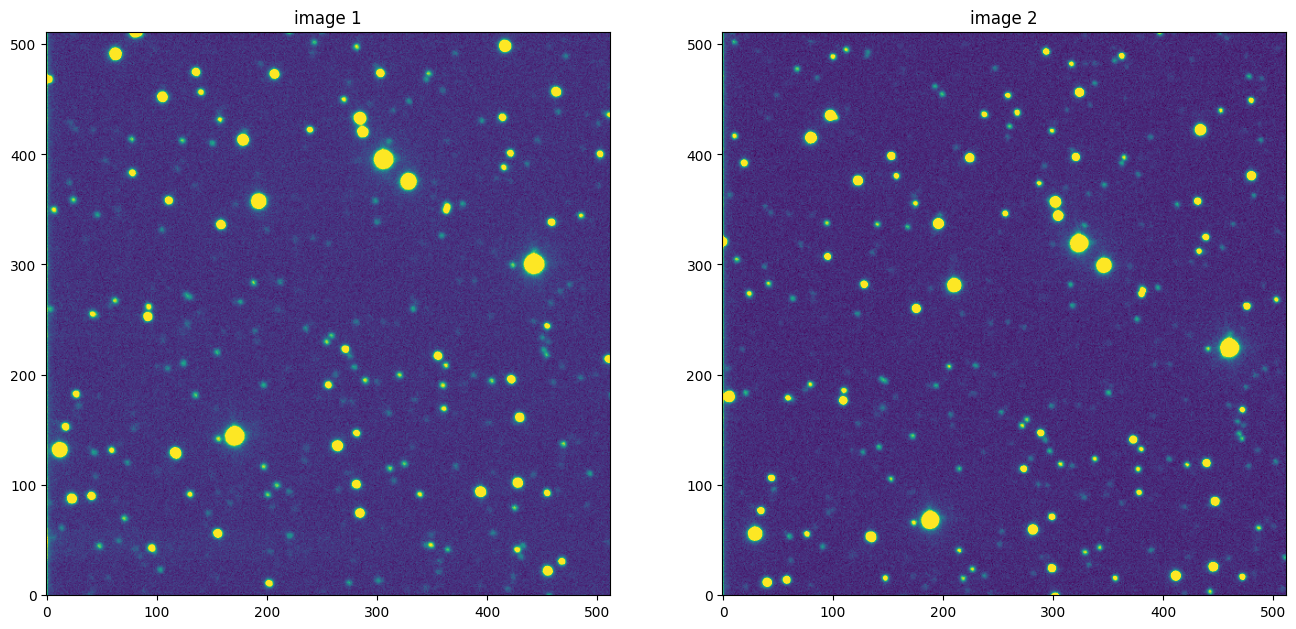

In [64]:
## display two images to see the shift
f,axs=plt.subplots(1,2,figsize=(16,8))
data1=fits.getdata('../../reduced_data/p4466637UW32R004.fit')
data2=fits.getdata('../../reduced_data/p4466637UW32R007.fit')
axs[0].imshow(data1,vmin=300,vmax=600,origin='lower')
axs[0].set_title("image 1")
axs[1].imshow(data2,vmin=300,vmax=600,origin='lower')
axs[1].set_title("image 2")

40.0 36.0


Text(0.5, 1.0, 'y shift')

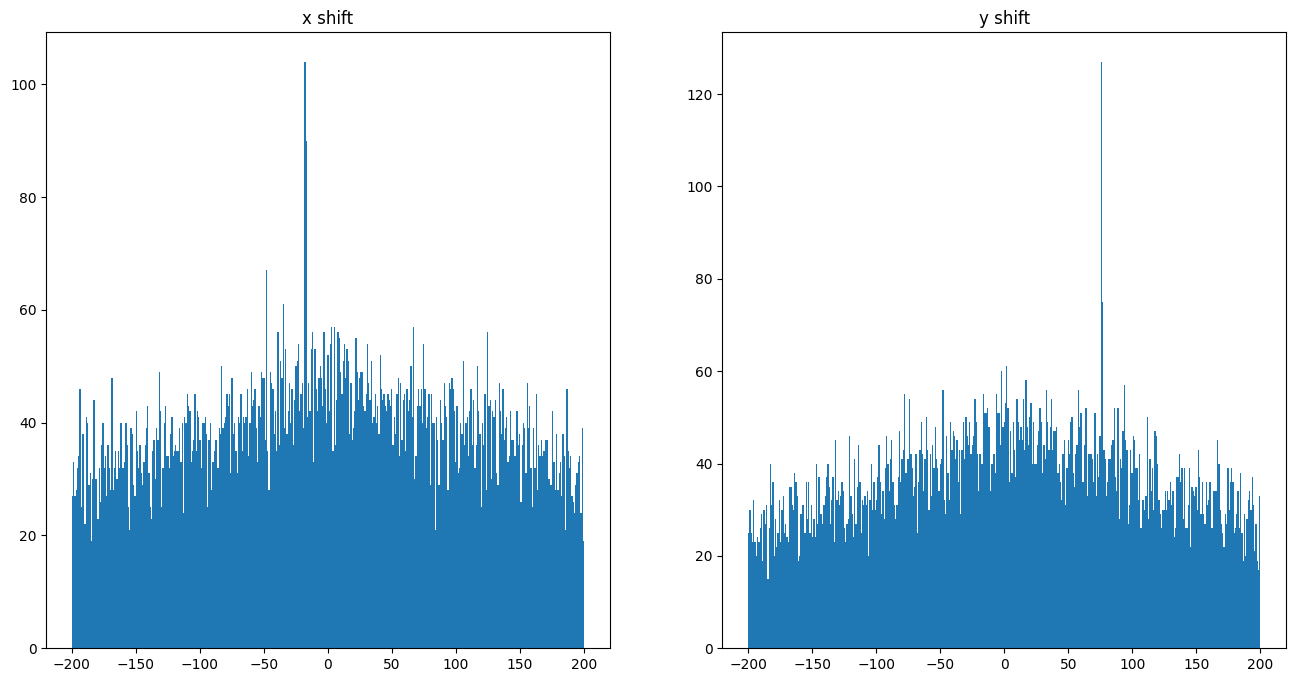

In [66]:
cat1 = Table.read('../../reduced_data/p4466637UW32R004-cat.fits')
cat2 = Table.read('../../reduced_data/p4466637UW32R007-cat.fits')
x1=cat1['xcenter']
y1=cat1['ycenter']
x2=cat2['xcenter']
y2=cat2['ycenter']
ncat1=len(cat1)
ncat2=len(cat2)
XX=[]
YY=[]
for i in range(ncat2):
 XX.extend((x1-x2[i]))
 YY.extend((y1-y2[i]))
XX=np.array(XX)
YY=np.array(YY)
xhist,xbins=np.histogram(XX,range=[-200,200],bins=401)
yhist,ybins=np.histogram(YY,range=[-200,200],bins=401)
print(np.median(xhist),np.median(yhist))
f,axs=plt.subplots(1,2,figsize=(16,8))
axs[0].hist(XX,range=[-200,200],bins=401)
axs[0].set_title("x shift")
axs[1].hist(YY,range=[-200,200],bins=401)
axs[1].set_title("y shift")


In [67]:
## calculate shifts and update catalogs

for i,ifile in enumerate(cfiles):
    rootname,_=os.path.splitext(ifile)
    catfile=rootname+'-cat.fits'
    print("calculate shifts :", i+1,len(cfiles),ifile)
    if i==0:
        cat1=Table.read(catfile)
        x1=cat1['xcenter']
        y1=cat1['ycenter']
        if 'x_sht' not in cat1.colnames:
            xcol=Table.Column(x1,name='x_sht')
            ycol=Table.Column(y1,name='y_sht')
            cat1.add_columns([xcol,ycol])
        else:
            cat1['x_sht']=x1
            cat1['y_sht']=y1
        cat1.write(catfile,overwrite=True)
    else:
        cat2=Table.read(catfile)
        ncat2=len(cat2)
        x2=cat2['xcenter']
        y2=cat2['ycenter']
        XX=[]; YY=[]
        for j in range(ncat2):
            XX.extend((x1-x2[j]))
            YY.extend((y1-y2[j]))
        XX=np.array(XX)
        YY=np.array(YY)
        xhist,xbins=np.histogram(XX,range=[-200,200],bins=401)
        yhist,ybins=np.histogram(YY,range=[-200,200],bins=401)
        idx=np.argmax(xhist)
        xsht0=(xbins[idx]+xbins[idx+1])/2.0
        idx=np.argmax(yhist)
        ysht0=(ybins[idx]+ybins[idx+1])/2.0
        print("initial shift:",xsht0,ysht0)
        mask=(np.abs(XX-xsht0)<3) & (np.abs(YY-ysht0)<3)
        print(mask.sum())
        xsht1=np.median(XX[mask])
        ysht1=np.median(YY[mask])
        print("finetuned shift:",xsht1,ysht1)
        if 'x_sht' not in cat1.colnames:
            xcol=Table.Column(x2+xsht1,name='x_sht')
            ycol=Table.Column(y2+ysht1,name='y_sht')
            cat2.add_columns([xcol,ycol])
        else:
            cat2['x_sht']=x2+xsht1
            cat2['y_sht']=y2+ysht1
        
        cat2.write(catfile,overwrite=True)

calculate shifts : 1 172 ../../reduced_data/p4466637UW32R004.fit
calculate shifts : 2 172 ../../reduced_data/p4466637UW32R005.fit
initial shift: -0.9975062344139616 1.4210854715202004e-14
118
finetuned shift: -0.8550783433754674 0.01155629121060997
calculate shifts : 3 172 ../../reduced_data/p4466637UW32R007.fit
initial shift: -17.955112219451365 75.81047381546136
109
finetuned shift: -17.660358225498896 76.06000143737981
calculate shifts : 4 172 ../../reduced_data/p4466637UW32R008.fit
initial shift: -17.955112219451365 75.81047381546136
110
finetuned shift: -18.172576137889145 76.21521181840582
calculate shifts : 5 172 ../../reduced_data/p4466637UW32R009.fit
initial shift: -25.935162094763086 14.96259351620948
121
finetuned shift: -26.147051163623757 15.059563617237472
calculate shifts : 6 172 ../../reduced_data/p4466637UW32R010.fit
initial shift: -21.945137157107226 -34.91271820448877
118
finetuned shift: -21.43211539274718 -34.76182296805062
calculate shifts : 7 172 ../../reduced_da

Text(0.5, 1.0, 'red: target, cyan: comparison, yellow: validation')

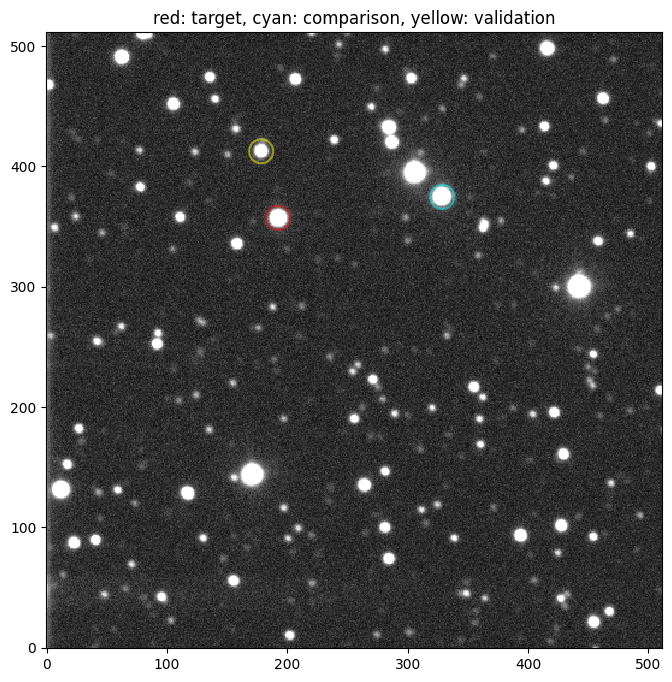

In [68]:
## define target

data=fits.getdata('../../reduced_data/p4466637UW32R004.fit')
x_targ,y_targ=(193.39-1,358.18-1)
#x_comp,y_comp=(159.54-1,336.61-1)
#x_vali,y_vali=(111.89-1,358.47-1)
x_comp,y_comp=(329.82-1,375.68-1)
x_vali,y_vali=(179.24-1,413.60-1)
aper_targ = CircularAperture((x_targ,y_targ), r=10.)
aper_comp = CircularAperture((x_comp,y_comp), r=10.)
aper_vali = CircularAperture((x_vali,y_vali), r=10.)
plt.figure(figsize=(8,8))
plt.imshow(data, cmap='Greys_r', origin='lower', vmin=300,vmax=600, interpolation='nearest')
aper_targ.plot(color='red', lw=1.5, alpha=0.5)
aper_comp.plot(color='cyan', lw=1.5, alpha=0.5)
aper_vali.plot(color='yellow', lw=1.5, alpha=0.5)
plt.title('red: target, cyan: comparison, yellow: validation')


In [69]:
## compute lightcurves

from astropy.time import Time
naper=len(radii)
nfiles=len(cfiles)
lc_targ=np.zeros((1+2*naper,nfiles))
lc_comp=np.zeros((1+2*naper,nfiles))
lc_vali=np.zeros((1+2*naper,nfiles))
print("calculating light curves...")
for i,ifile in enumerate(cfiles):
 rootname,_=os.path.splitext(ifile)
 head=fits.getheader(ifile)
 datestr=head['DATE-OBS']
 date=np.array(datestr.split('/')).astype('int')
 date[2]=2000
 timestr=head['TIME']
 datetime="%4d-%2d-%2d"%(date[2],date[1],date[0])+'T'+timestr.strip()
 t=Time(datetime,format='isot',scale='utc')
 jd=t.mjd
 lc_targ[0,i]=jd
 lc_comp[0,i]=jd
 lc_vali[0,i]=jd
 
 print("MJD: ",datetime,jd)
 catfile=rootname+'-cat.fits'
 print("reading:", i+1,len(cfiles),ifile)
 
 cat=fits.getdata(catfile)
 x=cat['x_sht']
 y=cat['y_sht']
 
 # get target star
 d=np.sqrt((x-x_targ)**2+(y-y_targ)**2)
 idx=np.argmin(d)
 icat=cat[idx]
 dt=d[idx]
 if d[idx]<2:
     for j in range(naper):
         lc_targ[j+1,i]=icat['aperture_sum_'+str(j)]
         lc_targ[naper+j+1,i]=icat['aperture_sum_err_'+str(j)]
 else:
     lc_targ[1:,i]=np.nan
 
 
 # get comparison star
 d=np.sqrt((x-x_comp)**2+(y-y_comp)**2)
 idx=np.argmin(d)
 icat=cat[idx]
 dc=d[idx]
 if d[idx]<2:
     for j in range(naper):
         lc_comp[j+1,i]=icat['aperture_sum_'+str(j)]
         lc_comp[naper+j+1,i]=icat['aperture_sum_err_'+str(j)]
 else:
     lc_comp[1:,i]=np.nan
 
 # get validation star
 d=np.sqrt((x-x_vali)**2+(y-y_vali)**2)
 idx=np.argmin(d)
 icat=cat[idx]
 dv=d[idx]
 if d[idx]<2:
     for j in range(naper):
         lc_vali[j+1,i]=icat['aperture_sum_'+str(j)]
         lc_vali[naper+j+1,i]=icat['aperture_sum_err_'+str(j)]
 else:
     lc_vali[1:,i]=np.nan
 
 print(dt,dc,dv)

calculating light curves...
MJD:  2000-12-10T12:10:40.0 51888.50740740741
reading: 1 172 ../../reduced_data/p4466637UW32R004.fit
0.4891743402030274 0.29596955942146086 0.3210173500846472
MJD:  2000-12-10T12:12:24.0 51888.50861111111
reading: 2 172 ../../reduced_data/p4466637UW32R005.fit
0.515817159360423 0.4783630087705666 0.3408126668030038
MJD:  2000-12-10T12:18:00.0 51888.5125
reading: 3 172 ../../reduced_data/p4466637UW32R007.fit
0.20670406566364047 0.42444406065863177 0.3359264418692698
MJD:  2000-12-10T12:19:44.0 51888.513703703706
reading: 4 172 ../../reduced_data/p4466637UW32R008.fit
0.44480032092794597 0.32826104678459184 0.4105502006067956
MJD:  2000-12-10T12:22:06.0 51888.51534722222
reading: 5 172 ../../reduced_data/p4466637UW32R009.fit
0.508758088437156 0.2975294886481899 0.38922168395608076
MJD:  2000-12-10T12:25:44.0 51888.51787037037
reading: 6 172 ../../reduced_data/p4466637UW32R010.fit
0.3569521825872546 0.346402172313598 0.4277478609470314
MJD:  2000-12-10T12:39:11.0

photerr for target/comparison: 0.0009082825008251522
photerr for validation/comparison: 0.0004437145190868108
(-1.7925272376380421, -1.792599351525089, 0.0038503537980329582)


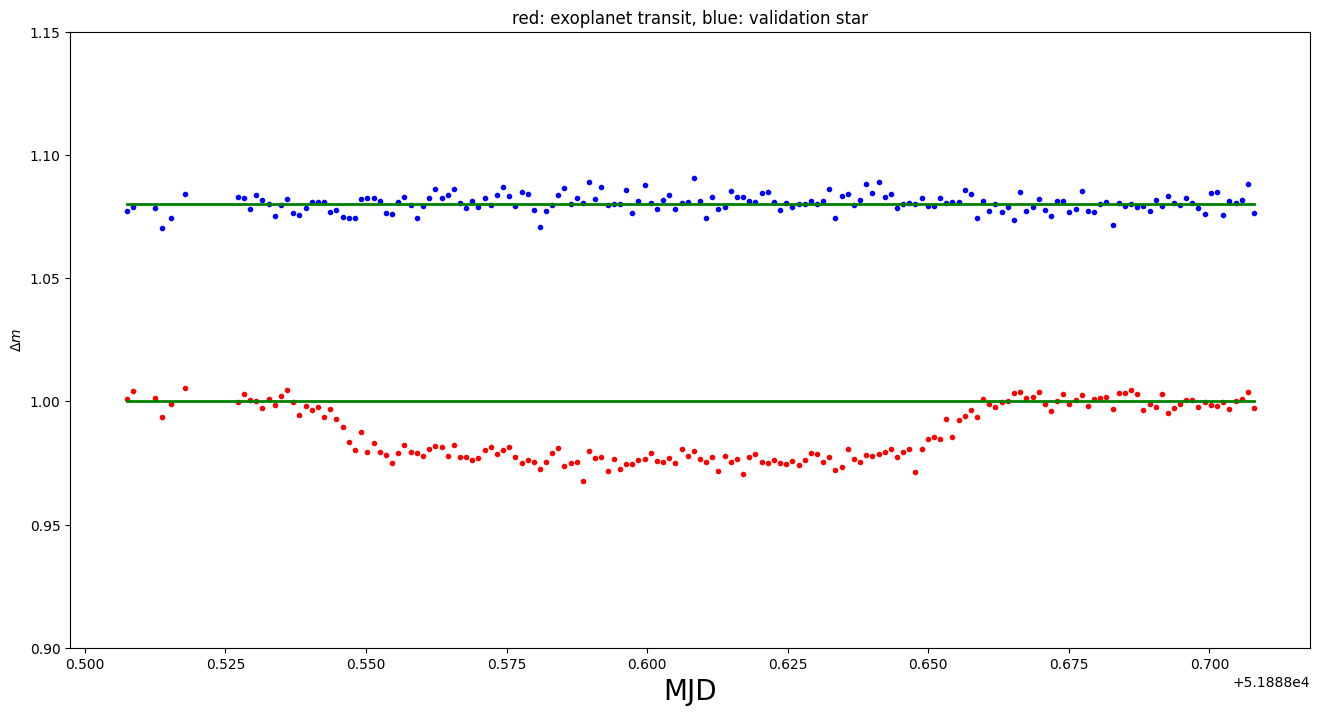

In [70]:
## plot lightcurves

iaper=4 # for iaper aperture
rlc_targ=lc_targ[iaper+1,:]/lc_comp[iaper+1,:]
rlc_vali=lc_vali[iaper+1,:]/lc_comp[iaper+1,:]
a1=1.0/lc_comp[iaper+1,:]; e1=lc_targ[iaper+naper+1,:]
a2=lc_targ[iaper+1,:]/lc_comp[iaper+1,:]**2; e2=lc_comp[iaper+naper+1,:]
rlcerr_targ=np.sqrt(a1**2*e1**2+a2**2*e2**2)
a1=1.0/lc_comp[iaper+1,:]; e1=lc_vali[iaper+naper+1,:]
a2=lc_vali[iaper+1,:]/lc_comp[iaper+1,:]**2; e2=lc_comp[iaper+naper+1,:]
rlcerr_vali=np.sqrt(a1**2*e1**2+a2**2*e2**2)
print('photerr for target/comparison:',np.median(rlcerr_targ))
print('photerr for validation/comparison:',np.median(rlcerr_vali))
idx=np.argmin(np.abs(lc_targ[0,:]-51888.67))
norm_targ=np.median(rlc_targ[idx:])
norm_vali=np.median(rlc_vali[idx:])
tmpx=[np.min(lc_targ[0,:]),np.max(lc_targ[0,:])]
plt.figure(figsize=(16,8))
plt.plot(lc_targ[0,:],rlc_targ/norm_targ,'r.')
plt.plot(lc_targ[0,:],rlc_vali/norm_vali+0.08,'b.')
plt.plot(tmpx,[1.0,1.0],'g-',linewidth=2)
plt.plot(tmpx,[1.08,1.08],'g-',linewidth=2)
plt.ylim([0.9,1.15])
plt.xlabel('MJD',fontsize=20)
plt.ylabel('$\Delta m$')
plt.title("red: exoplanet transit, blue: validation star")
print(sigma_clipped_stats(2.5*np.log10(rlc_vali),sigma=3,maxiters=3))